## Task: Train a logistic regression classifier to predict survival of passengers in titanic dataset

You are provided with code to download and load titanic dataset in the form of a csv

In the dataset, each row represents information about the passengers of titanic, Like their name, gender, class etc(See the dataframe below for more info).

The target column is 'Survived' which tells us whether this particular passenger sirvived or not

Use any of all the other columns as the input features (You can choose to drop the columns you see are not worth keeping).

Your task is to train a logistic regression model which takes the input featues (make sure to not accidentaly feed the 'Survived' column to the model as input) and predicts the whether a passenger with these features would survive or not.

Make sure to put emphasis on code quality and to include a way to judge how good your model is performing on **un-seen data (untrained data)**.

As a bonus, see if you can figure out which feature is most likely to affect the survivability of a passenger.

In [ ]:
from IPython.display import clear_output

In [ ]:
#Don't change this code

%pip install gdown==4.5

clear_output()

In [ ]:
!gdown 18YfCgT3Rk7uYWrUzgjb2UR3Nyo9Z68bK  # Download the csv file.

Downloading...
From: https://drive.google.com/uc?id=18YfCgT3Rk7uYWrUzgjb2UR3Nyo9Z68bK
To: /content/titanic.csv
100% 60.3k/60.3k [00:00<00:00, 60.0MB/s]


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path='/content/drive/MyDrive/ex_kaust/titanic.csv'

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
titanic_data = pd.read_csv( path)
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
titanic_data.dtypes #name ,sex , ticket ,cabin and embarked object you ckeck if it is important or delet it

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
data_y = titanic_data['Survived']
data_x = titanic_data.drop(columns=['Survived'])

In [10]:
data_y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [11]:
data_x

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [13]:
titanic_data.info() #age have null value ,cabin and Embarked

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##Feature Engnearing

1- Age very important can not deleat it we will to by using median from non missing value

2- Name , Cabin,Ticket not important col we can dropped

3-Embarked fill with s beacuse than 70% of the people boarded from Southampton

"Embarked implies where the traveler mounted from. There are three possible values for Embark — Southampton, Cherbourg, and Queenstown.More than 70% of the people boarded from Southampton. " that i take from google when i want to read about data

In [15]:
#Data Cleaning and Data Drop Process
titanic_data['Fare'] = titanic_data['Fare'].fillna(titanic_data['Fare'].dropna().median())
titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].dropna().median())
# Change to categoric column to numeric
titanic_data.loc[titanic_data['Sex']=='male','Sex']=0
titanic_data.loc[titanic_data['Sex']=='female','Sex']=1
# instead of nan values
titanic_data['Embarked']=titanic_data['Embarked'].fillna('S')
# Change to categoric column to numeric
titanic_data.loc[titanic_data['Embarked']=='S','Embarked']=0
titanic_data.loc[titanic_data['Embarked']=='C','Embarked']=1
titanic_data.loc[titanic_data['Embarked']=='Q','Embarked']=2

In [16]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


In [18]:
#Drop unnecessary columns
drop_elements = ['Name','Cabin','Ticket']
titanic_data = titanic_data.drop(drop_elements, axis=1)

In [19]:
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


In [21]:
titanic_data.PassengerId[300]

301

In [22]:
titanic_data.PassengerId[401]# after check passanger id that is like index and it is not real id of passenger then can be deleated not important

402

In [23]:
titanic_data = titanic_data.drop('PassengerId', axis=1)
print(titanic_data)

     Survived  Pclass Sex   Age  SibSp  Parch     Fare Embarked
0           0       3   0  22.0      1      0   7.2500        0
1           1       1   1  38.0      1      0  71.2833        1
2           1       3   1  26.0      0      0   7.9250        0
3           1       1   1  35.0      1      0  53.1000        0
4           0       3   0  35.0      0      0   8.0500        0
..        ...     ...  ..   ...    ...    ...      ...      ...
886         0       2   0  27.0      0      0  13.0000        0
887         1       1   1  19.0      0      0  30.0000        0
888         0       3   1  28.0      1      2  23.4500        0
889         1       1   0  26.0      0      0  30.0000        1
890         0       3   0  32.0      0      0   7.7500        2

[891 rows x 8 columns]


<ipython-input-24-22eec6b42ba7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  DataCorr = titanic_data.corr()


<Axes: >

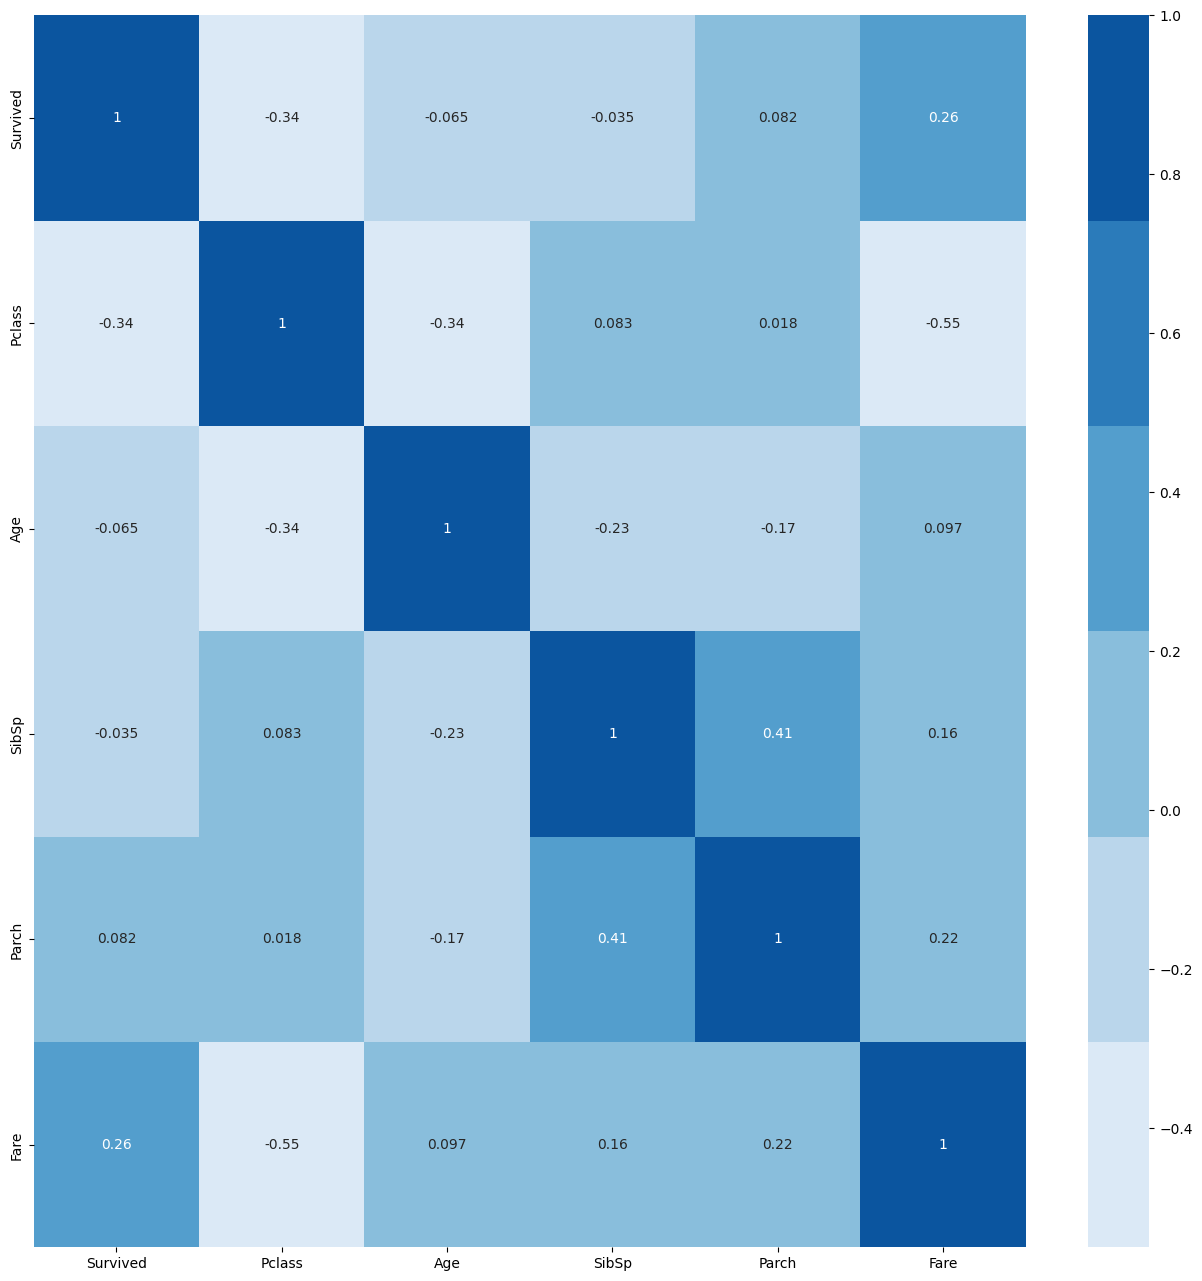

In [24]:
DataCorr = titanic_data.corr()

plt.subplots( figsize = (16,16))
sns.heatmap( DataCorr, annot = True, cmap = sns.color_palette('Blues'))


have the  good correlation in this feature with target wih positice correlatiob with fare ,parch and the rest with negative correlation

In [25]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

#input and output
target = titanic_data['Survived']
features = titanic_data[['Pclass','Sex','SibSp','Parch','Age','Embarked']]

#Build test and training test
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=42)



In [26]:
classifier = linear_model.LogisticRegression()
classifier_ = classifier.fit(X_train,y_train)
target_predict=classifier_.predict(X_test)


print("Logistic Regression Score: ",accuracy_score(y_test,target_predict))

from sklearn.metrics import mean_squared_error, r2_score
print ("MSE    :",mean_squared_error(y_test,target_predict))
print ("R2     :",r2_score(y_test,target_predict))

Logistic Regression Score:  0.8044692737430168
MSE    : 0.19553072625698323
R2     : 0.1936936936936937


In [27]:
y_pred_train = classifier_.predict(X_train)
y_pred_test = classifier_.predict(X_test)

In [28]:
print('Accuracy score for train : ', accuracy_score(y_train, y_pred_train)*100)
print('Accuracy score for test : ', accuracy_score(y_test, y_pred_test)*100)

Accuracy score for train :  79.91573033707866
Accuracy score for test :  80.44692737430168
